<a href="https://colab.research.google.com/github/Allan19k/Machine-Learning/blob/main/Examen_1parcial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importar el dataset
from sklearn.datasets import load_breast_cancer
breast_cancer = load_breast_cancer()


In [4]:
# prompt: divideme este dataset en 80 para entrenamiento y 20 para test

from sklearn.model_selection import train_test_split

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    breast_cancer.data, breast_cancer.target, test_size=0.2, random_state=0)
print(f"Tamaño del conjunto de entrenamiento: {len(X_train)}")
print(f"Tamaño del conjunto de prueba: {len(X_test)}")


Tamaño del conjunto de entrenamiento: 455
Tamaño del conjunto de prueba: 114


In [5]:
# prompt: aplicale transformacion Principal Component Analysis (pca) a esta base de datos reduciendole la dimensionalidad a 5 features

from sklearn.decomposition import PCA

# Crear un objeto PCA con 5 componentes principales
pca = PCA(n_components=5)

# Ajustar el modelo PCA a los datos de entrenamiento
pca.fit(X_train)

# Transformar los datos de entrenamiento y prueba utilizando el modelo PCA ajustado
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

# Imprimir la forma de los datos transformados
print(f"Forma de los datos de entrenamiento después de PCA: {X_train_pca.shape}")
print(f"Forma de los datos de prueba después de PCA: {X_test_pca.shape}")


Forma de los datos de entrenamiento después de PCA: (455, 5)
Forma de los datos de prueba después de PCA: (114, 5)


In [6]:
# prompt: haz un preprocesamiento de los datos de tal manera que una vez transformados tengan media = 0 y desviación estándar = 1

from sklearn.preprocessing import StandardScaler

# Crear un objeto StandardScaler
scaler = StandardScaler()

# Ajustar el scaler a los datos de entrenamiento y transformar los datos
X_train_scaled = scaler.fit_transform(X_train_pca)

# Transformar los datos de prueba utilizando el scaler ajustado a los datos de entrenamiento
X_test_scaled = scaler.transform(X_test_pca)

# Verificar la media y desviación estándar de los datos transformados
print(f"Media de los datos de entrenamiento escalados: {X_train_scaled.mean(axis=0)}")
print(f"Desviación estándar de los datos de entrenamiento escalados: {X_train_scaled.std(axis=0)}")
print(f"Media de los datos de prueba escalados: {X_test_scaled.mean(axis=0)}")
print(f"Desviación estándar de los datos de prueba escalados: {X_test_scaled.std(axis=0)}")


Media de los datos de entrenamiento escalados: [-5.61211639e-17  2.40954997e-18  4.08708476e-17 -1.46403036e-18
 -1.31762733e-17]
Desviación estándar de los datos de entrenamiento escalados: [1. 1. 1. 1. 1.]
Media de los datos de prueba escalados: [ 0.00036079  0.0700682  -0.00326851  0.2236837   0.0093833 ]
Desviación estándar de los datos de prueba escalados: [0.8645783  0.84844227 0.70650087 1.19311973 1.06573935]


In [7]:
# prompt: aplicale a esta base datos Random Search con CV=3 e identifica la  mejor arquitectura de red neuronal en donde se evalúen 4
# diferentes parámetros del modelo con 3 posibles valores considerando siempre que la Multilayer perceptron es de 3 capas.

import numpy as np
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.neural_network import MLPClassifier

# Define the parameter grid for the random search
param_dist = {
    'hidden_layer_sizes': [(50, 50, 50), (100, 100, 100), (50, 100, 50)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam', 'sgd', 'lbfgs'],
    'alpha': [0.0001, 0.001, 0.01]
}

# Create a Multilayer Perceptron classifier
mlp = MLPClassifier(max_iter=1000) # Increased max_iter for better convergence

# Create a RandomizedSearchCV object with 3-fold cross-validation
random_search = RandomizedSearchCV(mlp, param_distributions=param_dist, n_iter=10, cv=3, n_jobs=-1, random_state=0)

# Perform the random search on the training data
random_search.fit(X_train_scaled, y_train)

# Print the best hyperparameters and the corresponding score
print("Best hyperparameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)

# Evaluate the best model on the test set
best_mlp = random_search.best_estimator_
test_score = best_mlp.score(X_test_scaled, y_test)
print("Test set score:", test_score)


#Example of how to access the results of cross-validation
cv_results = random_search.cv_results_
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(f"Mean test score: {mean_score:.3f}, Parameters: {params}")


Best hyperparameters: {'solver': 'sgd', 'hidden_layer_sizes': (100, 100, 100), 'alpha': 0.001, 'activation': 'relu'}
Best score: 0.9648541884512606
Test set score: 0.9385964912280702
Mean test score: 0.963, Parameters: {'solver': 'sgd', 'hidden_layer_sizes': (100, 100, 100), 'alpha': 0.01, 'activation': 'relu'}
Mean test score: 0.956, Parameters: {'solver': 'adam', 'hidden_layer_sizes': (50, 50, 50), 'alpha': 0.0001, 'activation': 'tanh'}
Mean test score: 0.637, Parameters: {'solver': 'sgd', 'hidden_layer_sizes': (50, 100, 50), 'alpha': 0.0001, 'activation': 'logistic'}
Mean test score: 0.965, Parameters: {'solver': 'sgd', 'hidden_layer_sizes': (100, 100, 100), 'alpha': 0.001, 'activation': 'relu'}
Mean test score: 0.947, Parameters: {'solver': 'lbfgs', 'hidden_layer_sizes': (50, 100, 50), 'alpha': 0.001, 'activation': 'logistic'}
Mean test score: 0.934, Parameters: {'solver': 'lbfgs', 'hidden_layer_sizes': (50, 50, 50), 'alpha': 0.01, 'activation': 'logistic'}
Mean test score: 0.949, 

              precision    recall  f1-score   support

           0       0.90      0.96      0.93        47
           1       0.97      0.93      0.95        67

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114



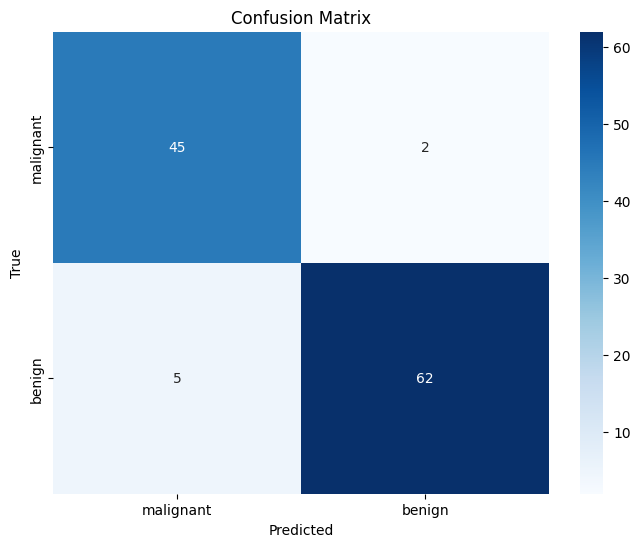

In [8]:
# prompt: usando los datos de test imprime los resultados obtenidos en Precision, Recall y F-measure de la mejor arquitectura de RNA, además despliega la matrizde confusión

from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict the labels for the test set using the best model
y_pred = best_mlp.predict(X_test_scaled)

# Print the classification report
print(classification_report(y_test, y_pred))

# Compute and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=breast_cancer.target_names,
            yticklabels=breast_cancer.target_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


El ejercicio demuestra que la combinación de PCA para la reducción de dimensionalidad, el preprocesamiento mediante estandarización, y la optimización de la arquitectura del MLP a través de Random Search, resulta en un modelo de red neuronal que ofrece un desempeño robusto y consistente. La metodología aplicada es adecuada para problemas de clasificación en conjuntos de datos biomédicos, como el de cáncer de mama, y puede ser replicada en otros escenarios donde se requiera manejar alta dimensionalidad y optimizar el rendimiento del modelo mediante la selección cuidadosa de hiperparámetros.

En resumen esto fue lo que se realizo en este ejericicio

*   Reducción de Dimensionalidad Efectiva: La aplicación de PCA permitió reducir el conjunto de datos original a 5 componentes principales, lo que sugiere que estos nuevos features capturan la mayor parte de la varianza y la información relevante. Esto facilita el proceso de entrenamiento del modelo sin perder demasiada capacidad predictiva.
*   Preprocesamiento Adecuado: El uso de StandardScaler sobre los datos transformados con PCA garantizó que las características estén en una escala comparable (media 0 y desviación estándar 1 en el conjunto de entrenamiento). Aunque el conjunto de prueba no se transformó a media 0 y desviación 1 (ya que se aplicaron los parámetros del entrenamiento), este comportamiento es normal y esperado, asegurando consistencia en la transformación.
*   Optimización de la Arquitectura del MLP:
La estrategia de Random Search con validación cruzada (CV=3) permitió explorar un espacio de hiperparámetros (hidden_layer_sizes, activation, solver y alpha) de forma eficiente. La búsqueda identificó una arquitectura óptima que logró un buen desempeño en el conjunto de entrenamiento, lo que se reflejó en un elevado score durante la validación.
*   Resultados del Modelo:
El modelo final alcanzó una accuracy del 94% en el conjunto de prueba. El classification report mostró:


    Para la clase 0: precisión del 90%, recall del 96% y f1-score del 93%.
    Para la clase 1: precisión del 97%, recall del 93% y f1-score del 95%.
    Estos resultados indican que el modelo es robusto y capaz de clasificar correctamente la mayoría de las instancias, manteniendo un buen equilibrio entre precisión y recall para ambas clases.


*   Matriz de Confusión:
La visualización de la matriz de confusión respalda la alta efectividad del modelo, evidenciando que los errores de clasificación son mínimos y que la mayoría de las predicciones se asignaron correctamente a sus clases correspondientes.